# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : Rotation 45 degré 

In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Start with source Hx

In [25]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.02     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity (used resin)
resolution = 200
len_scale = 25

sxy = b*np.sqrt(2) + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions (using perfect matched layer)
boudary_layer = mp.PML(pml)

# Geometry of the cavity (rotated 45 degree)
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     mp.Vector3(1,1,0), 
                     mp.Vector3(1,-1,0),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 2                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 24                      # pulse frequency width

#src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, mp.Vector3(0))
src_centers = [mp.Vector3(-0.11,0.07), mp.Vector3(0.11,0.07), mp.Vector3(0.11,-0.07), mp.Vector3(-0.11,-0.07)]
src_size = mp.Vector3(0)
src_amps = [1,-1,-1,1]
src_compt = mp.Ex

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]

symmetries = [mp.Mirror(mp.X, phase = -1), mp.Mirror(mp.Y, phase=-1)]
#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=src,
                    symmetries= symmetries,
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

In [ ]:
# visualize the cavité
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [3]:
# define step function to collect fields
def append_fieldsTM(sim):
    box = mp.Volume(center=pt_harminv, size=mp.Vector3(0,0))
    hz_fields.append(sim.get_array(vol=box, component=mp.Hz))
    ex_fields.append(sim.get_array(vol=box, component=mp.Ex))

def append_fieldsTE(sim):
    box = mp.Volume(center=pt_harminv, size=mp.Vector3(0,0))
    ez_fields.append(sim.get_array(vol=box, component=mp.Ez))
    hx_fields.append(sim.get_array(vol=box, component=mp.hx))

In [4]:
hz_fields = []
ex_fields = []
pt_harminv = mp.Vector3(-0.2,0.05)
# Chercher les fréquences de résonnance autour de fcen avec la composante Hz
h_ex = mp.Harminv(mp.Ex, pt_harminv, fcen, df,2000) 
sim.reset_meep()
sim.change_sources(src)
sim.symmetries= symmetries
sim.run(mp.after_sources(h_ex),
         mp.after_sources(append_fieldsTM),
        until_after_sources=700)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00241303 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.0669241 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.4166666567326)

Meep progress: 35.645/700.4166666567326 = 5.1% done in 4.0s, 74.6s to go
on time step 14303 (time=35.7575), 0.000279668 s/step
Meep progress: 72.1375/700.4166666567326 = 10.3% done in 8.0s, 69.7s to go
on time step 28903 (time=72.2575), 0.000273981 s/step
Meep progress: 108.84/700.4166666567326 = 15.5% done in 12.0s, 65.2s to go
on time step 43578 (time=108.945), 0.000272603 s/step
Meep progress: 146.01500000000001/700.4166666567326 = 20.8% done in 16.0s, 60.8s to go
on time step 58458 (time=146.145), 0.000268833 s/step
Meep progress: 182.95000000000002/700.4166666567326 = 26.1% done in 20.0s, 56.6s to go
on time step 73237 (time=183.093), 0.000270664 s/step
Meep progress: 218.7825/700.4166666567326 = 31.2% done in 24.0s, 52.8s to go
on time step 87570 (time=218.925), 0.000279098 s/step
Meep progress: 253.7725/700.4166666567326 = 36.2% done in 28.0s, 49.3s to go
on time step 101556 (time=253.89), 0.000286018 s/step
Meep progress: 288.85/700.4166666567326 = 41.2% done in 32.0s, 45.6s to

## Plot the fields at pt_harminv

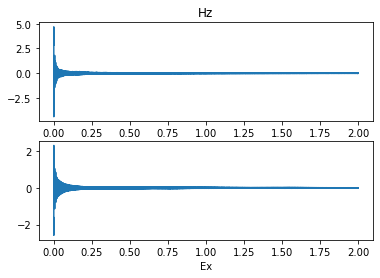

In [5]:
t1 = np.arange(0.0, 2.0, 2/len(hz_fields))
t2 = np.arange(0.0, 2.0, 2/len(ex_fields))

plt.subplot(2, 1, 1)
plt.plot(t1, hz_fields)
plt.title('Hz')

plt.subplot(2, 1, 2)
plt.plot(t2, ex_fields)
plt.xlabel('Ex')

plt.show()

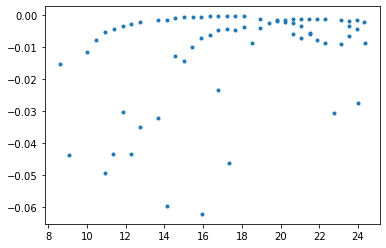

In [6]:
modes_Ex = np.array(h_ex.modes)
plt.plot(np.abs(modes_Ex[:,0]), -np.abs(modes_Ex[:,1]), '.')

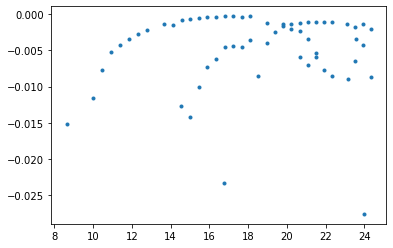

In [42]:
modes_Ex_f = modes_Ex[np.nonzero(np.abs(modes_Ex[:,1]) < 0.03)]
plt.plot(np.abs(modes_Ex_f[:,0]), -np.abs(modes_Ex_f[:,1]), '.')

## Change the source to mp.Hz or symmetries

In [38]:
hz_fields = []
ex_fields = []
pt_harminv = mp.Vector3(-0.2,0.05)
''''''
src_amps = [1,-1,1,-1]
src_compt = mp.Hz
symmetries=[mp.Mirror(mp.X, phase = -1), mp.Mirror(mp.Y, phase=-1)]
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]


# Chercher les fréquences de résonnance autour de fcen avec la composante Hz
h_hz = mp.Harminv(mp.Hz, pt_harminv, fcen, df,2000) 

sim.reset_meep()
sim.change_sources(src)
sim.symmetries= symmetries

In [39]:
sim.run(mp.after_sources(h_hz),
         #mp.after_sources(append_fieldsTM),
        until_after_sources=700)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00221801 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.0691659 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.4166666567326)

Meep progress: 71.78750000000001/700.4166666567326 = 10.2% done in 4.0s, 35.0s to go
on time step 28737 (time=71.8425), 0.00013921 s/step
Meep progress: 139.4725/700.4166666567326 = 19.9% done in 8.0s, 32.2s to go
on time step 55830 (time=139.575), 0.000147641 s/step
Meep progress: 208.3025/700.4166666567326 = 29.7% done in 12.0s, 28.4s to go
on time step 83381 (time=208.453), 0.00014519 s/step
Meep progress: 288.9175/700.4166666567326 = 41.2% done in 16.0s, 22.8s to go
on time step 115632 (time=289.08), 0.000124027 s/step
Meep progress: 369.6175/700.4166666567326 = 52.8% done in 20.0s, 17.9s to go
on time step 147917 (time=369.793), 0.000123901 s/step
Meep progress: 450.8025/700.4166666567326 = 64.4% done in 24.0s, 13.3s to go
on time step 180394 (time=450.985), 0.000123165 s/step
Meep progress: 531.3575/700.4166666567326 = 75.9% done in 28.0s, 8.9s to go
on time step 212620 (time=531.55), 0.000124125 s/step
Meep progress: 612.4425/700.4166666567326 = 87.4% done in 32.0s, 4.6s to go
o

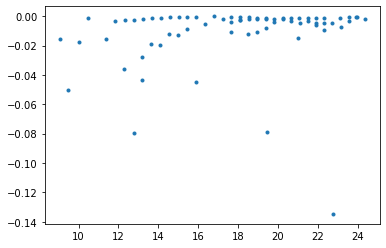

In [40]:
modes_Hz = np.array(h_hz.modes)
plt.plot(np.abs(modes_Hz[:,0]), -np.abs(modes_Hz[:,1]), '.')

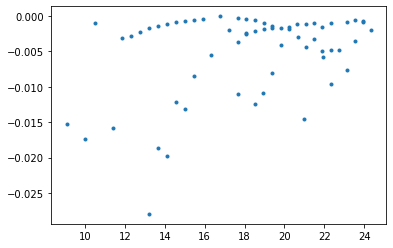

In [41]:
modes_Hz_f = modes_Hz[np.nonzero(np.abs(modes_Hz[:,1]) < 0.03)]
plt.plot(np.abs(modes_Hz_f[:,0]), -np.abs(modes_Hz_f[:,1]), '.')

## Change the source to mp.Ez or symmetries

In [29]:
ez_fields = []
hx_fields = []
pt_harminv = mp.Vector3(-0.2,0.05)
''''''
src_amps = [1,1,1,1]
src_compt = mp.Ez
symmetries= [mp.Mirror(mp.X), mp.Mirror(mp.Y)]
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]

# Chercher les fréquences de résonnance autour de fcen avec la composante Hx, source Ez
h_ez = mp.Harminv(mp.Ez, pt_harminv, fcen, df,2000) 

sim.reset_meep()
sim.change_sources(src)
sim.symmetries= symmetries

sim.run(mp.after_sources(h_ez),
        # mp.after_sources(append_fieldsTE),
        until_after_sources=700)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00269294 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.0709739 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.4166666567326)

Meep progress: 118.93/700.4166666567326 = 17.0% done in 4.0s, 19.6s to go
on time step 47647 (time=119.118), 8.39521e-05 s/step
Meep progress: 238.475/700.4166666567326 = 34.0% done in 8.0s, 15.5s to go
on time step 95471 (time=238.678), 8.3641e-05 s/step
Meep progress: 358.3175/700.4166666567326 = 51.2% done in 12.0s, 11.5s to go
on time step 143411 (time=358.528), 8.34393e-05 s/step
Meep progress: 477.0025/700.4166666567326 = 68.1% done in 16.0s, 7.5s to go
on time step 190895 (time=477.238), 8.42397e-05 s/step
Meep progress: 597.8575/700.4166666567326 = 85.4% done in 20.0s, 3.4s to go
on time step 239242 (time=598.105), 8.27364e-05 s/step
harminv1:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv1:, 6.197406166657096, -0.013950827507675356, 222.1160774601885, 0.004915672018787591, 0.00378464005337326+0.003136930197293863i, 8.925863797725337e-05+0.0i
harminv1:, 7.593887641341899, -0.005889032018847366, 644.7483743540773, 0.0034106009224704023, 0.0007041303657335443+0.00333

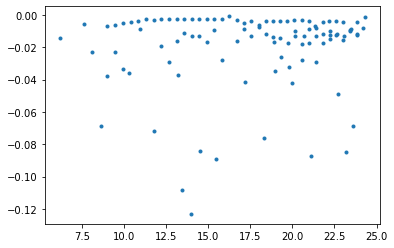

In [30]:
modes_Ez = np.array(h_ez.modes)
plt.plot(np.abs(modes_Ez[:,0]), -np.abs(modes_Ez[:,1]), '.')

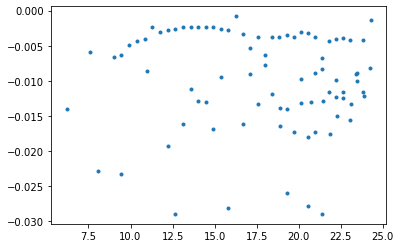

In [31]:
modes_Ez_f = modes_Ez[np.nonzero(np.abs(modes_Ez[:,1]) < 0.03)]
plt.plot(np.abs(modes_Ez_f[:,0]), -np.abs(modes_Ez_f[:,1]), '.')

## Change the source to mp.Hx or symmetries

In [33]:
ez_fields = []
hx_fields = []
pt_harminv = mp.Vector3(-0.2,0.05)
''''''
src_amps = [1,1,-1,-1]
src_compt = mp.Hx
symmetries=[mp.Mirror(mp.X), mp.Mirror(mp.Y, phase=-1)]
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]
# Chercher les fréquences de résonnance autour de fcen avec la composante Hx, source Ez
h_hx = mp.Harminv(mp.Hx, pt_harminv, fcen, df,2000) 

sim.reset_meep()
sim.change_sources(src)
sim.symmetries=symmetries

sim.run(mp.after_sources(h_hx),
        # mp.after_sources(append_fieldsTE),
        until_after_sources=700)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00162911 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.0771561 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.4166666567326)

Meep progress: 114.685/700.4166666567326 = 16.4% done in 4.0s, 20.4s to go
on time step 45937 (time=114.843), 8.70771e-05 s/step
Meep progress: 230.185/700.4166666567326 = 32.9% done in 8.0s, 16.3s to go
on time step 92143 (time=230.358), 8.65699e-05 s/step
Meep progress: 345.985/700.4166666567326 = 49.4% done in 12.0s, 12.3s to go
on time step 138470 (time=346.175), 8.63441e-05 s/step
Meep progress: 461.8925/700.4166666567326 = 65.9% done in 16.0s, 8.3s to go
on time step 184839 (time=462.098), 8.62649e-05 s/step
Meep progress: 578.33/700.4166666567326 = 82.6% done in 20.0s, 4.2s to go
on time step 231417 (time=578.543), 8.58781e-05 s/step
Meep progress: 695.0725/700.4166666567326 = 99.2% done in 24.0s, 0.2s to go
on time step 278115 (time=695.288), 8.56578e-05 s/step
harminv2:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv2:, 5.920274357214138, -0.053351585241830576, 55.48358432442901, 0.03736943826699835, -0.006788593196600664-0.036747651881474934i, 0.001331340090319409

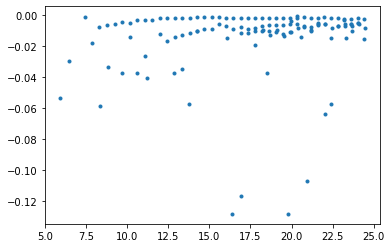

In [34]:
modes_Hx = np.array(h_hx.modes)
plt.plot(np.abs(modes_Hx[:,0]), -np.abs(modes_Hx[:,1]), '.')

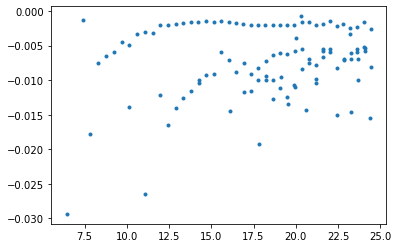

In [35]:
modes_Hx_f = modes_Hx[np.nonzero(np.abs(modes_Hx[:,1]) < 0.03)]
plt.plot(np.abs(modes_Hx_f[:,0]), -np.abs(modes_Hx_f[:,1]), '.')